In [146]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv('wisc_bc_data.csv')

In [148]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [149]:
x = df.drop(['id','diagnosis'],axis = 1)
y = df['diagnosis']

In [150]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
x_scaled = sca.fit_transform(x)

In [151]:
from sklearn.model_selection import train_test_split


In [152]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,
                                                 random_state = 0
    
)

In [153]:
from sklearn.neighbors import KNeighborsClassifier


In [154]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [155]:
y_pred = knn.predict(x_test)

In [156]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [157]:
accuracy_score(y_test,y_pred)

0.972027972027972

In [158]:

error = []

for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error.append(np.mean(y_test != y_pred))

In [159]:
error

[0.06293706293706294,
 0.04195804195804196,
 0.04895104895104895,
 0.04195804195804196,
 0.027972027972027972,
 0.027972027972027972,
 0.03496503496503497,
 0.027972027972027972,
 0.03496503496503497,
 0.027972027972027972,
 0.027972027972027972,
 0.027972027972027972,
 0.027972027972027972,
 0.03496503496503497,
 0.027972027972027972,
 0.03496503496503497,
 0.027972027972027972,
 0.04195804195804196,
 0.04195804195804196,
 0.04895104895104895,
 0.04195804195804196,
 0.04895104895104895,
 0.04895104895104895,
 0.04195804195804196,
 0.04895104895104895,
 0.04195804195804196,
 0.04895104895104895,
 0.04895104895104895,
 0.04895104895104895,
 0.04195804195804196,
 0.04895104895104895,
 0.04195804195804196,
 0.04195804195804196,
 0.04195804195804196,
 0.04195804195804196,
 0.04195804195804196,
 0.04195804195804196,
 0.04195804195804196,
 0.04195804195804196,
 0.04195804195804196,
 0.04195804195804196,
 0.04195804195804196,
 0.04195804195804196,
 0.04195804195804196,
 0.04195804195804196,
 

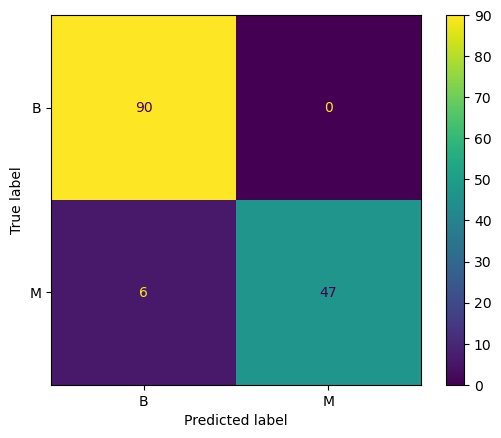

In [160]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

# hyper parameter grid

In [162]:
paras = {
    'n_neighbors' :[4,5,7,10,12,15,20],
    'weights' :['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}

In [163]:
from sklearn.model_selection import GridSearchCV


In [164]:
grid =  GridSearchCV(estimator = KNeighborsClassifier(),
                     param_grid = paras,
                     scoring = 'accuracy',
                     cv = 5)

In [165]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [4, 5, 7, 10, 12, 15, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [166]:
y_pred = grid.predict(x_test)

In [167]:
accuracy_score(y_test,y_pred)

0.972027972027972

In [168]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [169]:
from sklearn.model_selection import RandomizedSearchCV

In [170]:
rcv = RandomizedSearchCV(estimator = KNeighborsClassifier(),
                        param_distributions = paras,
                        scoring = 'accuracy',
                        cv = 5)

In [202]:
rcv.fit(x_scaled,y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [4, 5, 7, 10, 12, 15,
                                                        20],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [203]:
y_predi = rcv.predict(x_test)

In [204]:
accuracy_score(y_test,y_predi)

1.0